In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('weddiing_hall_details_cleaning_done.csv')

In [3]:
df.head()

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000
1,Officers Mess Function Plaza,Hyderabad,Banquet Halls,400,500,1,5.0,600,900
2,Radon Convention Hall,"Falaknuma, Hyderabad",Banquet Halls,500,600,1,5.0,500,800
3,Sitara Paradise Ameerpet,"Punjagutta, Hyderabad","Banquet Halls, Lawns / Farmhouses",300,500,1,5.0,100,300
4,KLCC Conventions,"Shamshabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",400,700,1,5.0,500,8000


In [4]:
df.isnull().sum()

Hall_name        0
Location         0
hall_deatails    0
Veg              0
Non-Veg          0
reviews          0
Rating           0
min_Seating      0
max_Seating      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hall_name      593 non-null    object 
 1   Location       593 non-null    object 
 2   hall_deatails  593 non-null    object 
 3   Veg            593 non-null    int64  
 4   Non-Veg        593 non-null    int64  
 5   reviews        593 non-null    int64  
 6   Rating         593 non-null    float64
 7   min_Seating    593 non-null    int64  
 8   max_Seating    593 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 41.8+ KB


In [7]:
df.describe()

,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,467.516020,642.401349,0.281619,0.673187,313.212479,599.603710
std,284.825623,302.659681,0.956812,1.654327,264.960652,623.759691
min,80.000000,170.000000,0.000000,0.000000,15.000000,50.000000
25%,350.000000,450.000000,0.000000,0.000000,150.000000,250.000000
50%,400.000000,700.000000,0.000000,0.000000,250.000000,450.000000
75%,500.000000,700.000000,0.000000,0.000000,400.000000,700.000000
max,2950.000000,3304.000000,9.000000,5.000000,1575.000000,8000.000000


### to show normal upto this

In [8]:
df.head(1)

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000


In [9]:
df['reviews'].value_counts()

0    507
1     54
2     16
5      5
3      4
4      3
9      2
8      1
6      1
Name: reviews, dtype: int64

<AxesSubplot:ylabel='reviews'>

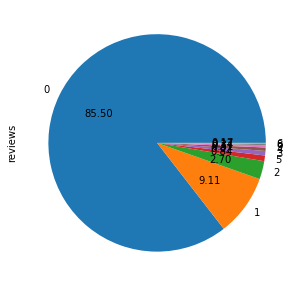

In [10]:
plt.figure(figsize=(10,5))
df['reviews'].value_counts().plot(kind='pie',autopct='%.2f')

In [11]:
df['Rating'].value_counts()

0.0    507
5.0     52
4.0     13
4.5      8
4.8      5
3.9      2
4.4      1
4.1      1
0.5      1
4.2      1
3.2      1
3.0      1
Name: Rating, dtype: int64

<AxesSubplot:ylabel='Rating'>

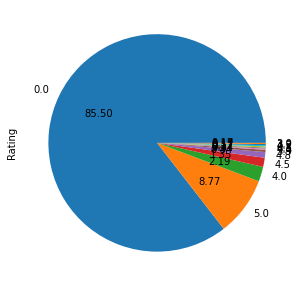

In [12]:
plt.figure(figsize=(10,5))
df['Rating'].value_counts().plot(kind='pie',autopct='%.2f')

## so, we can see that in every column. some column has  huge numbers in form of  missing (or) zero's. And less repeation in more rows. so we have to create the new dataframe(or) dataset for those columns only.

###### so that we can do eda. on that new specified column, for clear idea.

In [13]:
# example ====>>>> rating and review column has (507 numerical values are "zeros") 
# so,we two options==>>to drop the cloumn (or) to create new dataframe for that cloumn only . for the purpose of eda .
# as same apply's in the location and Hall_details cloumn.

In [14]:
df.head(1)

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000


In [15]:
k=df['Rating'].value_counts().index
k

Float64Index([0.0, 5.0, 4.0, 4.5, 4.8, 3.9, 4.4, 4.1, 0.5, 4.2, 3.2, 3.0], dtype='float64')

In [16]:
g=k[k>0.]
g.unique()

Float64Index([5.0, 4.0, 4.5, 4.8, 3.9, 4.4, 4.1, 0.5, 4.2, 3.2, 3.0], dtype='float64')

In [17]:
g.to_frame()

,0
5.0,5.0
4.0,4.0
4.5,4.5
4.8,4.8
3.9,3.9
4.4,4.4
4.1,4.1
0.5,0.5
4.2,4.2
3.2,3.2


In [18]:
x=g.value_counts().nlargest(11).index
x

Float64Index([5.0, 4.0, 4.5, 4.8, 3.9, 4.4, 4.1, 0.5, 4.2, 3.2, 3.0], dtype='float64')

In [19]:
df_r=pd.DataFrame()
for i in x:
    y=df.loc[df['Rating']==i].reset_index(drop=True)
    df_r=pd.concat([df_r,y])

In [20]:
df_r

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Officers Mess Function Plaza,Hyderabad,Banquet Halls,400,500,1,5.0,600,900
1,Radon Convention Hall,"Falaknuma, Hyderabad",Banquet Halls,500,600,1,5.0,500,800
2,Sitara Paradise Ameerpet,"Punjagutta, Hyderabad","Banquet Halls, Lawns / Farmhouses",300,500,1,5.0,100,300
3,KLCC Conventions,"Shamshabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",400,700,1,5.0,500,8000
4,Hotel SVM Grand,"Koti, Hyderabad","Banquet Halls, Hotels",350,450,1,5.0,100,400
...,...,...,...,...,...,...,...,...,...
0,Aranya Resort by Mrugavani,"Shamirpet, Hyderabad","Banquet Halls, Lawns / Farmhouses",900,900,5,4.1,150,500
0,Sri Mahathi Banquet Hall,"Secunderabad, Hyderabad",Banquet Halls,350,450,1,0.5,250,400
0,Syna Farms,Hyderabad,Lawns / Farmhouses,400,700,2,4.2,200,250
0,Aahwanam Luxury,"Saroornagar, Hyderabad","Banquet Halls, Lawns / Farmhouses",400,700,5,3.2,60,1000


### In my new data frame as df_r , we can see that my Rating , Reviews are almost same .
so, i dont need another column of review as a new dataframe. so, i continued with the df_r dataset.

### so here i cleared all the dataset as new . so, i can to eda well.

In [21]:
# now , lets see the difference

<AxesSubplot:ylabel='Rating'>

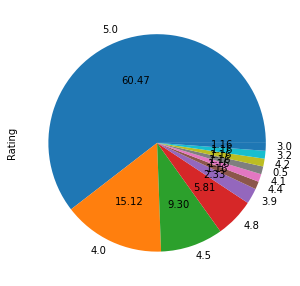

In [22]:
plt.figure(figsize=(10,5))
df_r['Rating'].value_counts().plot(kind='pie',autopct='%.2f')

In [23]:
# or numercial we use hist (or) kde 

<AxesSubplot:xlabel='reviews', ylabel='Count'>

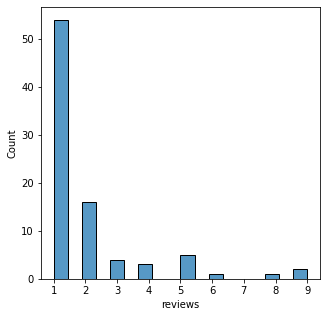

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(df_r['reviews'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

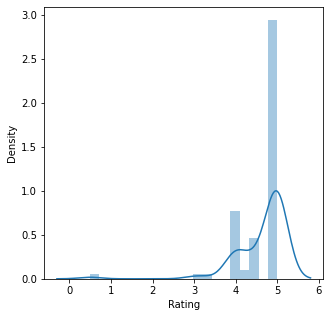

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(df_r['Rating'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

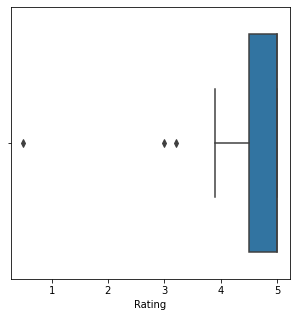

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(df_r['Rating'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


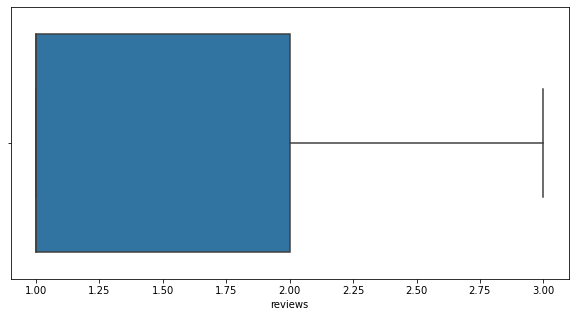

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(df_r['reviews'],showfliers=False)
plt.show()

### so, here we can see the clear difference in every plot we had drawn now. 
### so, lets start the eda process. 

# univariate

In [28]:
# categorical data ====>>> countplot,piechart,barplot

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


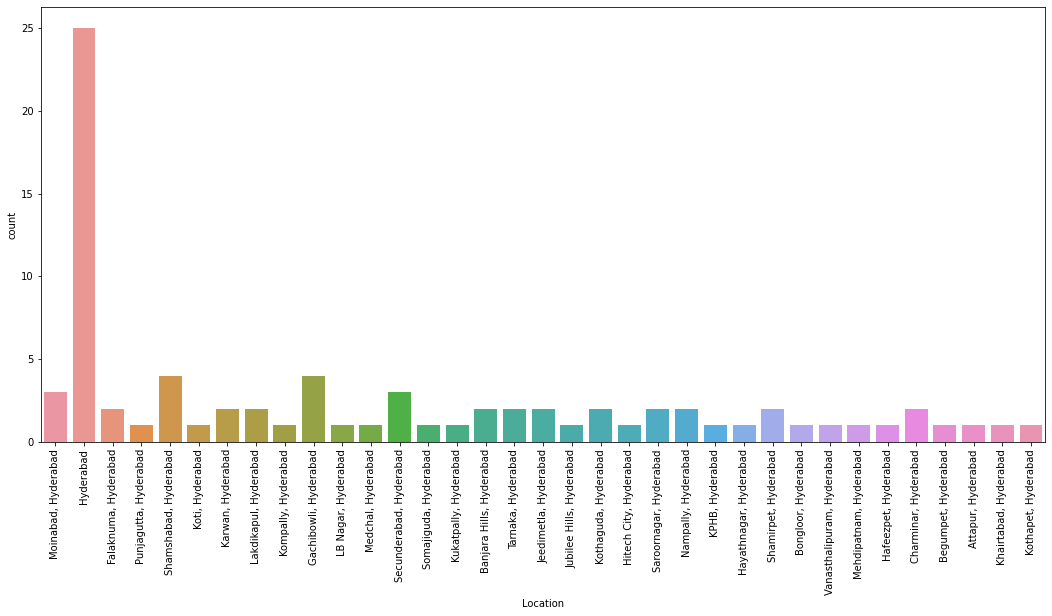

In [118]:
plt.figure(figsize=(18,8))
sns.countplot(df['Location'].head(80))
plt.xticks(rotation=90)
plt.show()

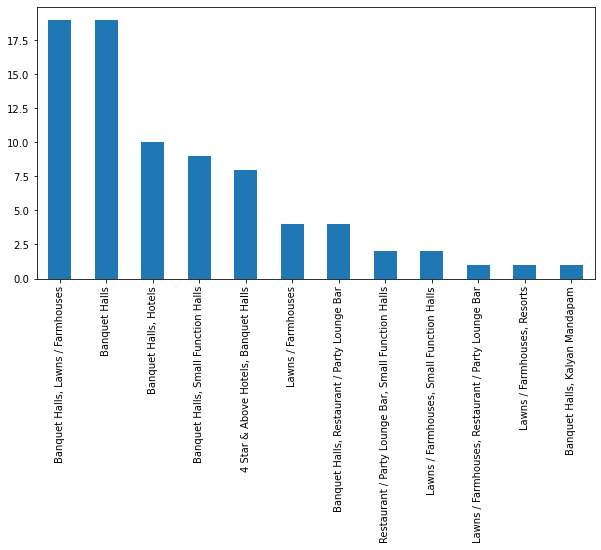

In [126]:
plt.figure(figsize=(10,5))
df['hall_deatails'].head(80).value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='hall_deatails'>

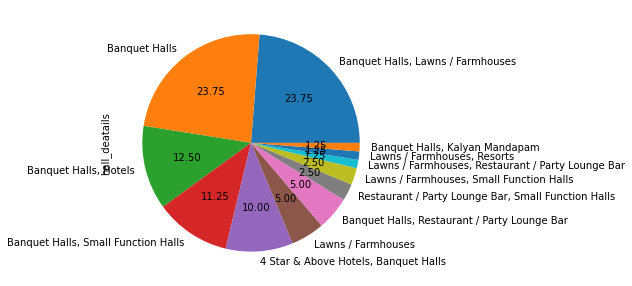

In [41]:
plt.figure(figsize=(10,5))
df['hall_deatails'].head(80).value_counts().plot(kind='pie',autopct='%.2f')

In [53]:
# numerical data ====>>> histogram plot,dist(or)Kde plot,boxplot.

<AxesSubplot:xlabel='Veg', ylabel='Count'>

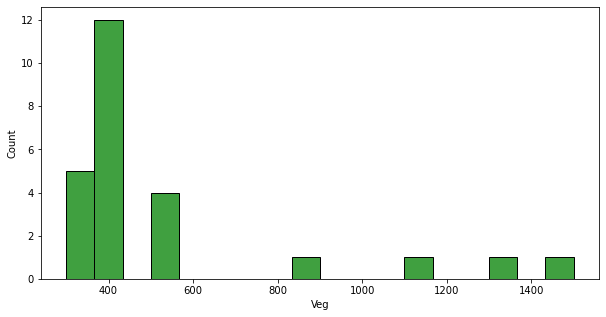

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['Veg'].head(25),color="green",)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Non-Veg', ylabel='Density'>

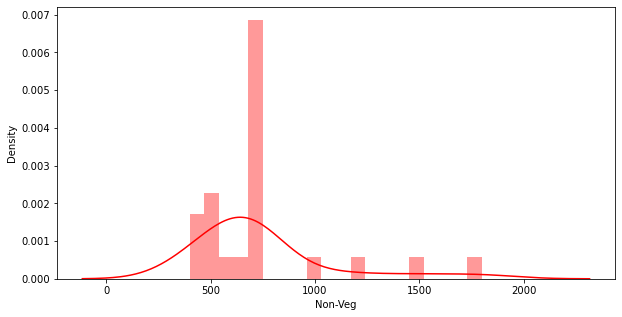

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df['Non-Veg'].head(25),bins=20,color="red",)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

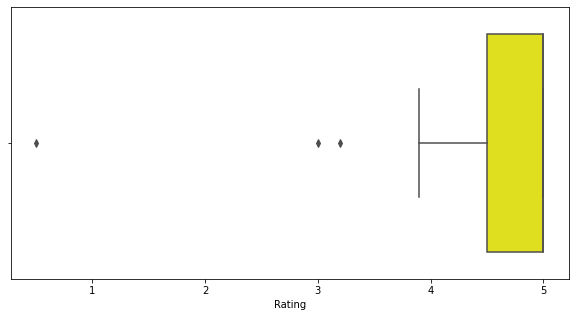

In [115]:
plt.figure(figsize=(10,5))
sns.boxplot(df_r['Rating'],color="yellow")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reviews'>

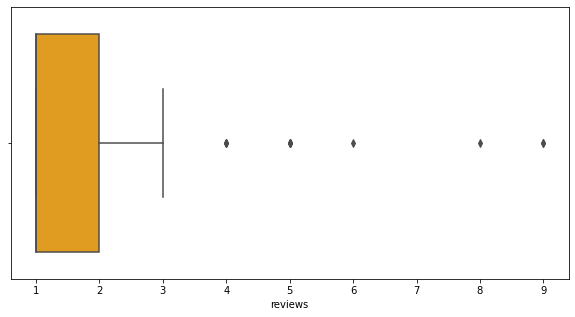

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(df_r['reviews'],color="orange")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


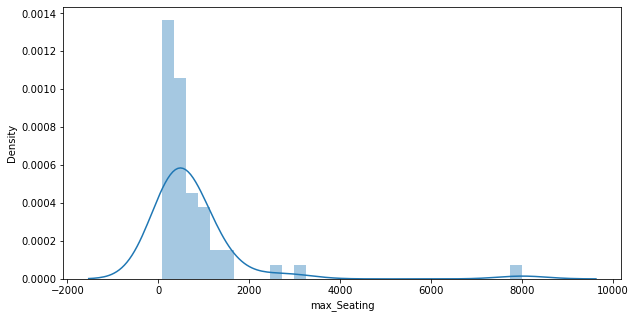

In [131]:
plt.figure(figsize=(10,5))
sns.distplot(df_r['max_Seating'].head(50))
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


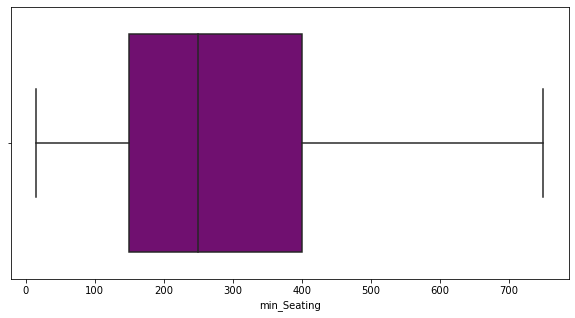

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(df['min_Seating'],color="purple",showfliers=False)
plt.show()

# bivariate

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Veg', ylabel='Non-Veg'>

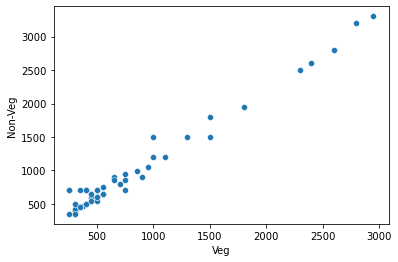

In [51]:
sns.scatterplot(df_r['Veg'],df_r['Non-Veg'])

<AxesSubplot:xlabel='hall_deatails', ylabel='Location'>

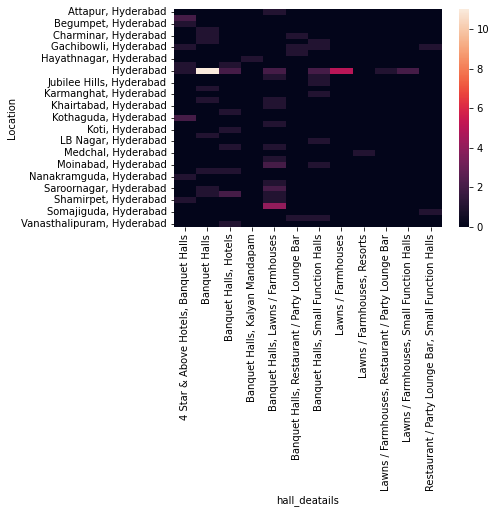

In [52]:
sns.heatmap(pd.crosstab(df_r['Location'],df_r['hall_deatails']))

In [53]:
df.head(1)

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000


In [54]:
# numerical & numerical =====>>> scatterplot,pairplot,heatmap(where as heatmap can performed for all categories)

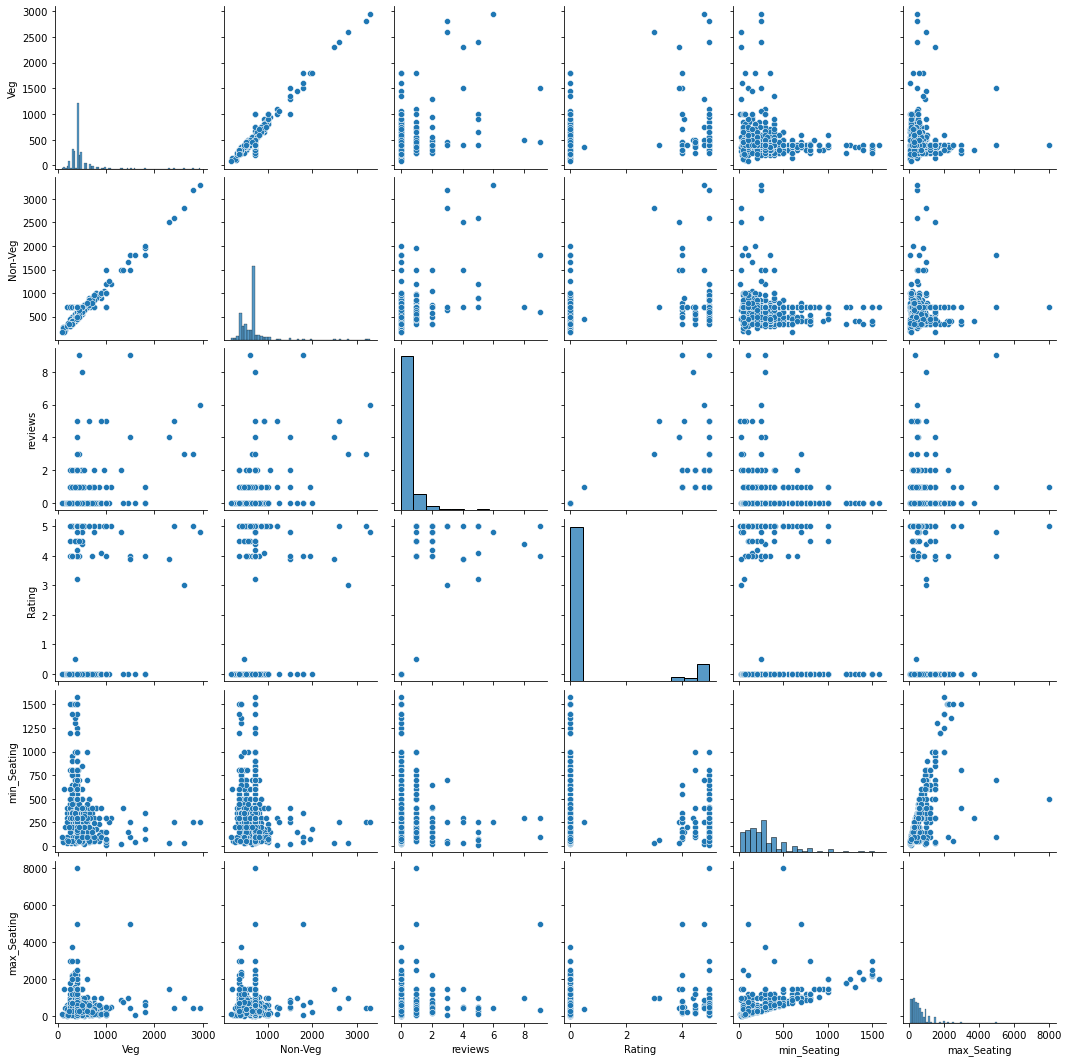

In [55]:
sns.pairplot(df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


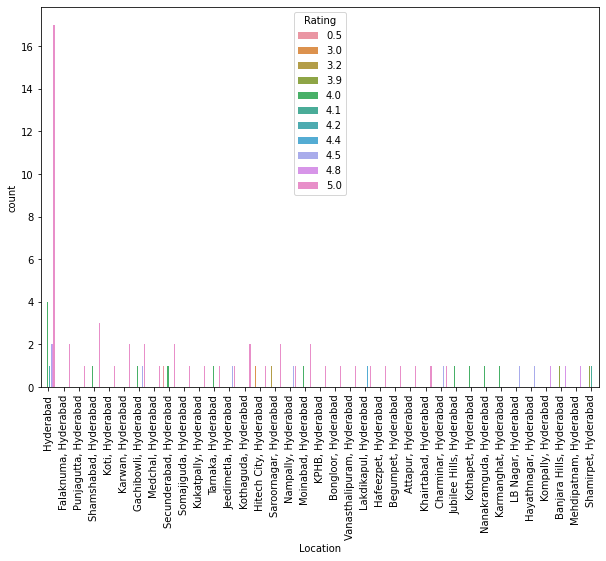

Rating,0.5,3.0,3.2,3.9,4.0,4.1,4.2,4.4,4.5,4.8,5.0
Location,,,,,,,,,,,
"Attapur, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Banjara Hills, Hyderabad",0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
"Begumpet, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Bongloor, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Charminar, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,50.0
"Falaknuma, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Gachibowli, Hyderabad",0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,0.0,50.0
"Hafeezpet, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Hayathnagar, Hyderabad",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


In [56]:
plt.figure(figsize=(10,7))
sns.countplot(df_r['Location'],hue=df_r['Rating'])
plt.xticks(rotation=90)
plt.show()
pd.crosstab(df_r['Location'],df_r['Rating']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


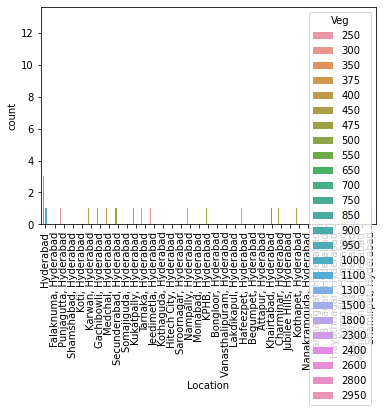

In [57]:
sns.countplot(df_r['Location'],hue=df_r['Veg'])
plt.xticks(rotation=90)
plt.show()

# bivaraite

In [132]:
df.head(1)

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000


In [133]:
df.describe()

,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,467.516020,642.401349,0.281619,0.673187,313.212479,599.603710
std,284.825623,302.659681,0.956812,1.654327,264.960652,623.759691
min,80.000000,170.000000,0.000000,0.000000,15.000000,50.000000
25%,350.000000,450.000000,0.000000,0.000000,150.000000,250.000000
50%,400.000000,700.000000,0.000000,0.000000,250.000000,450.000000
75%,500.000000,700.000000,0.000000,0.000000,400.000000,700.000000
max,2950.000000,3304.000000,9.000000,5.000000,1575.000000,8000.000000


In [ ]:
# num&num  =====>>>> scatterplot,heatplot

<AxesSubplot:>

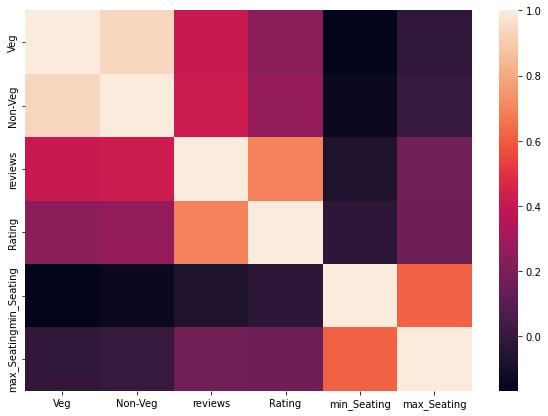

In [142]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

<AxesSubplot:>

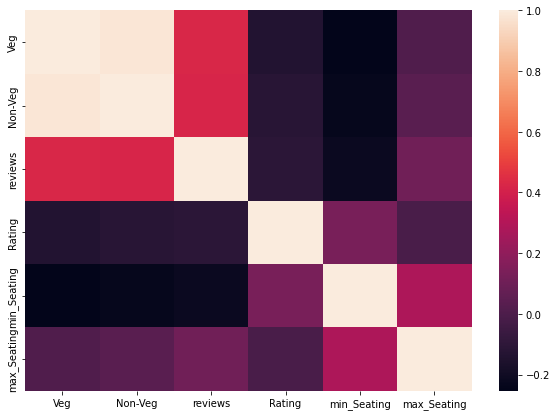

In [141]:
plt.figure(figsize=(10,7))
sns.heatmap(df_r.corr())

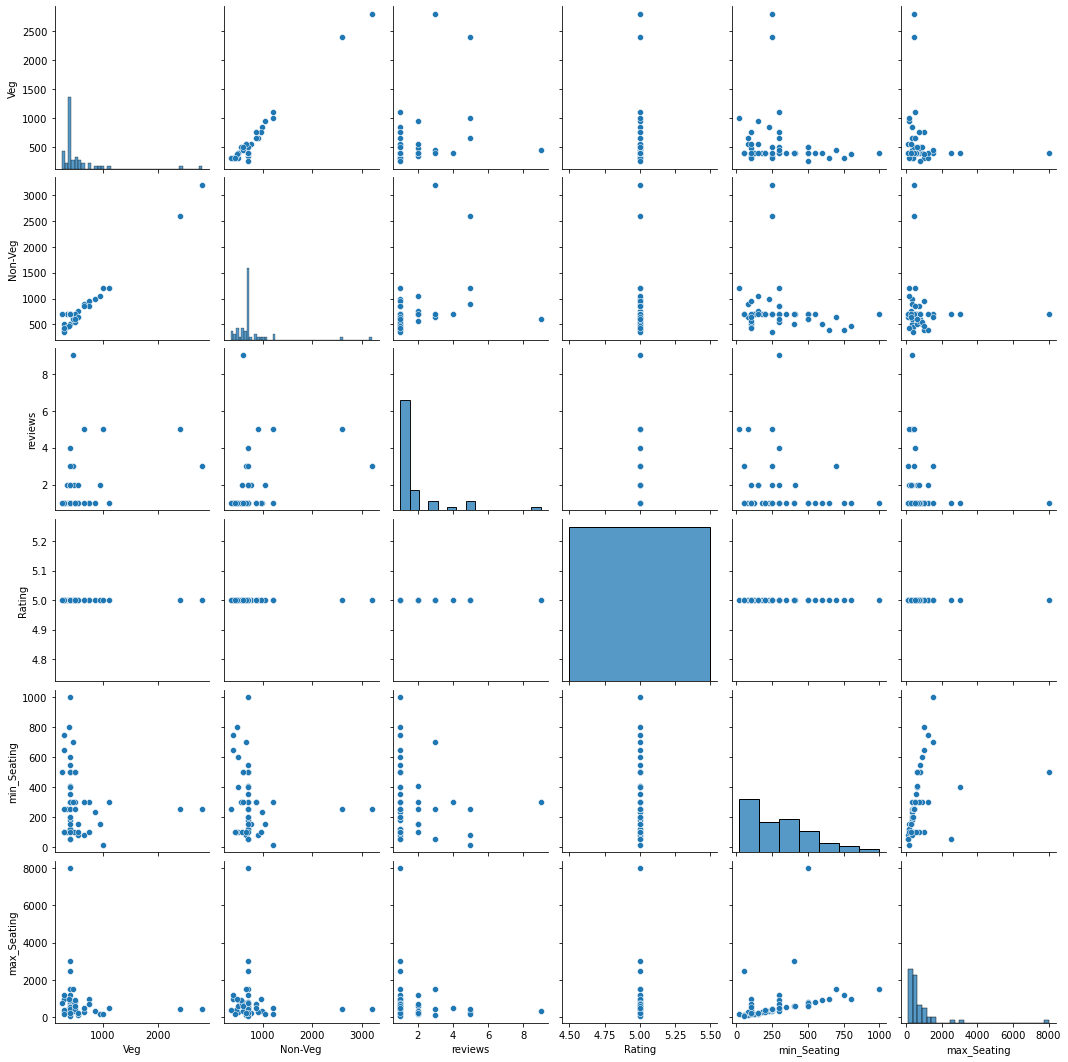

In [154]:
sns.pairplot(df_r.head(52))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Veg', ylabel='Non-Veg'>

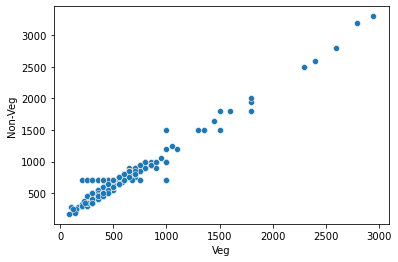

In [155]:
sns.scatterplot(df['Veg'],df['Non-Veg'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Veg', ylabel='Non-Veg'>

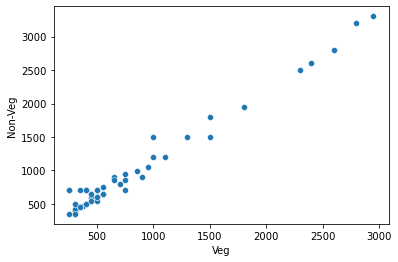

In [158]:
sns.scatterplot(df_r['Veg'],df_r['Non-Veg'])

In [ ]:
# cat&cat ===>>> heatmap,clustermap,

<AxesSubplot:xlabel='hall_deatails', ylabel='Location'>

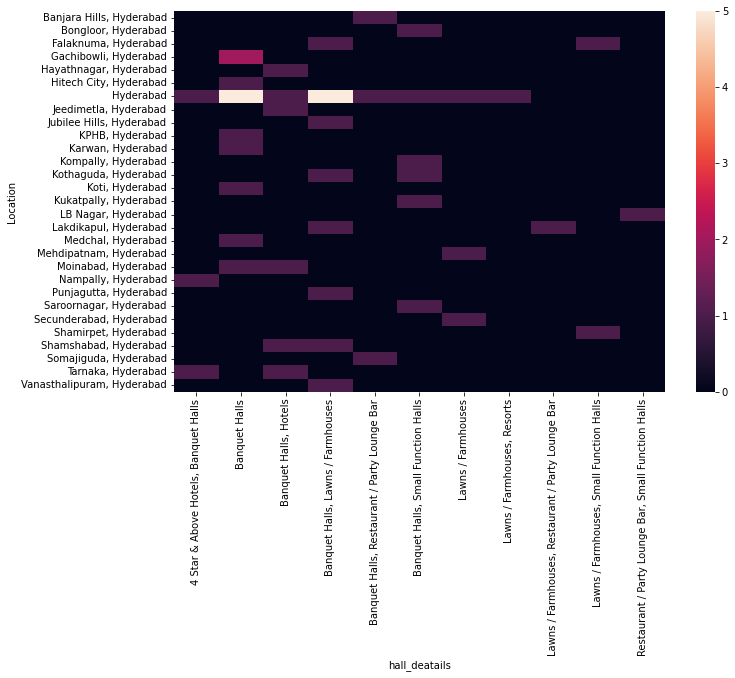

In [190]:
plt.figure(figsize=(11,7))
sns.heatmap(pd.crosstab(df['Location'],df_r['hall_deatails'].head(51)))

<Figure size 792x504 with 0 Axes>

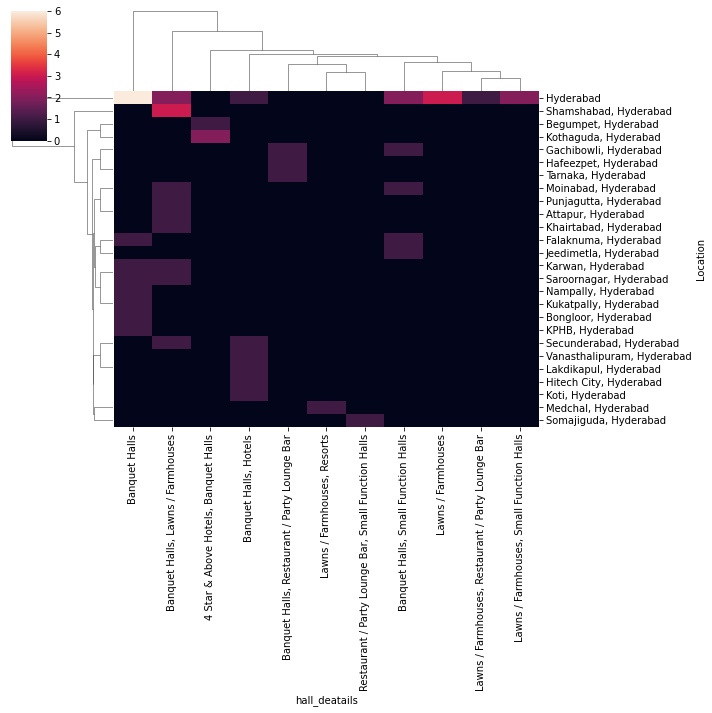

In [177]:
plt.figure(figsize=(11,7))
sns.clustermap(pd.crosstab(df_r['Location'].head(51),df_r['hall_deatails'].head(51)))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


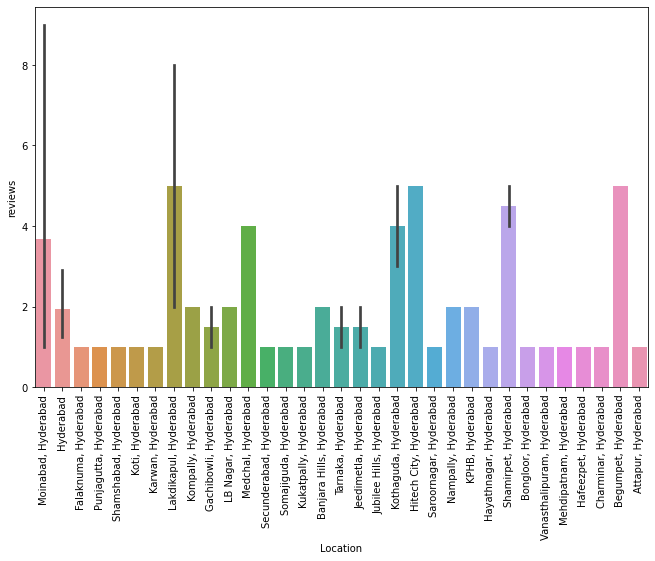

In [184]:
plt.figure(figsize=(11,7))
sns.barplot(df['Location'].head(69),df['reviews'])
plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


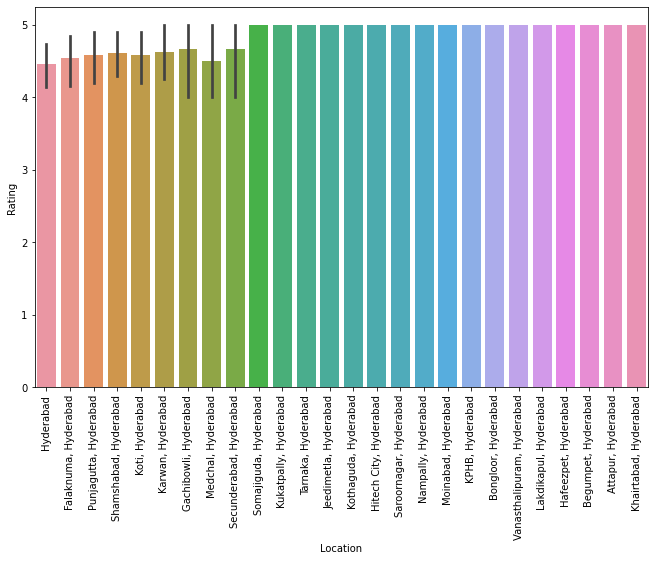

In [188]:
plt.figure(figsize=(11,7))
sns.barplot(df_r['Location'].head(51),df_r['Rating'])
plt.xticks(rotation=90)
plt.show()

In [58]:
# numerical and categorical.===>>> barplot,boxplot,distplot,heatmap,lineploty

In [59]:
df.head(1)

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


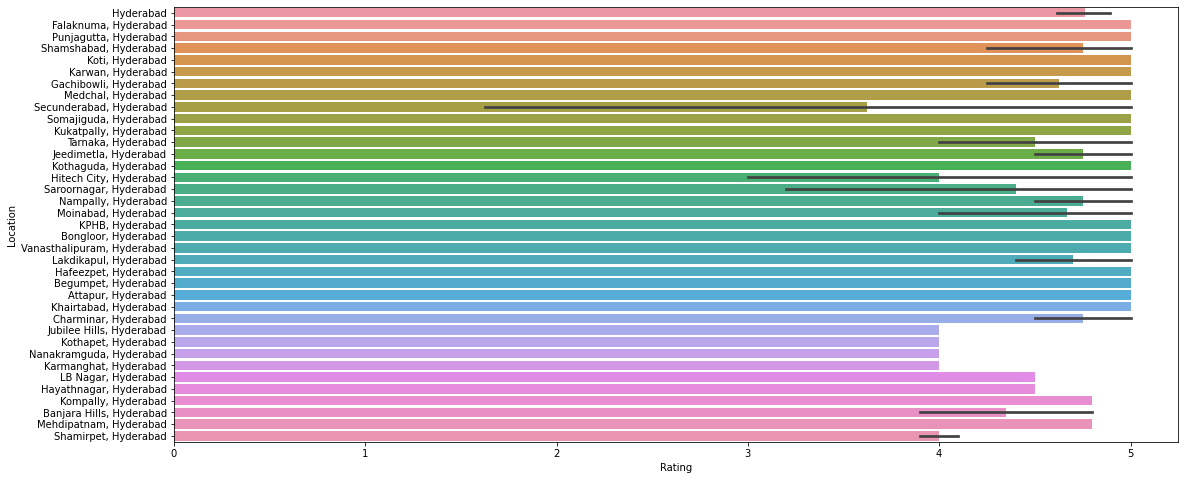

In [61]:
plt.figure(figsize=(18,8))
sns.barplot(df_r['Rating'],df_r['Location'])
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


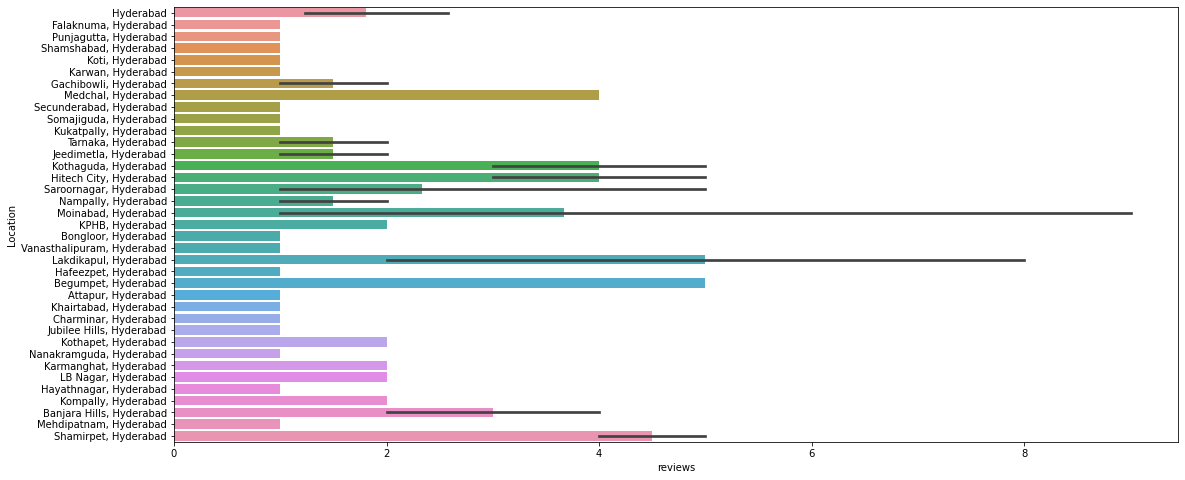

In [63]:
plt.figure(figsize=(18,8))
sns.barplot(df_r['reviews'],df_r['Location'])
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


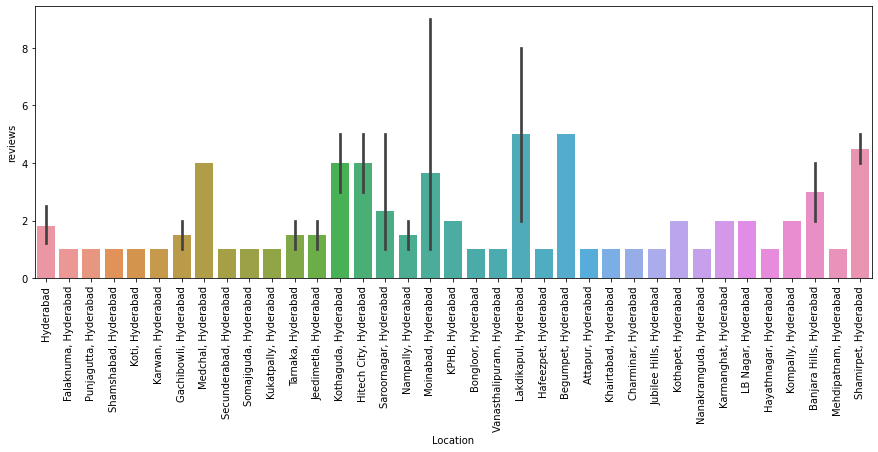

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(df_r['Location'],df_r['reviews'])
plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


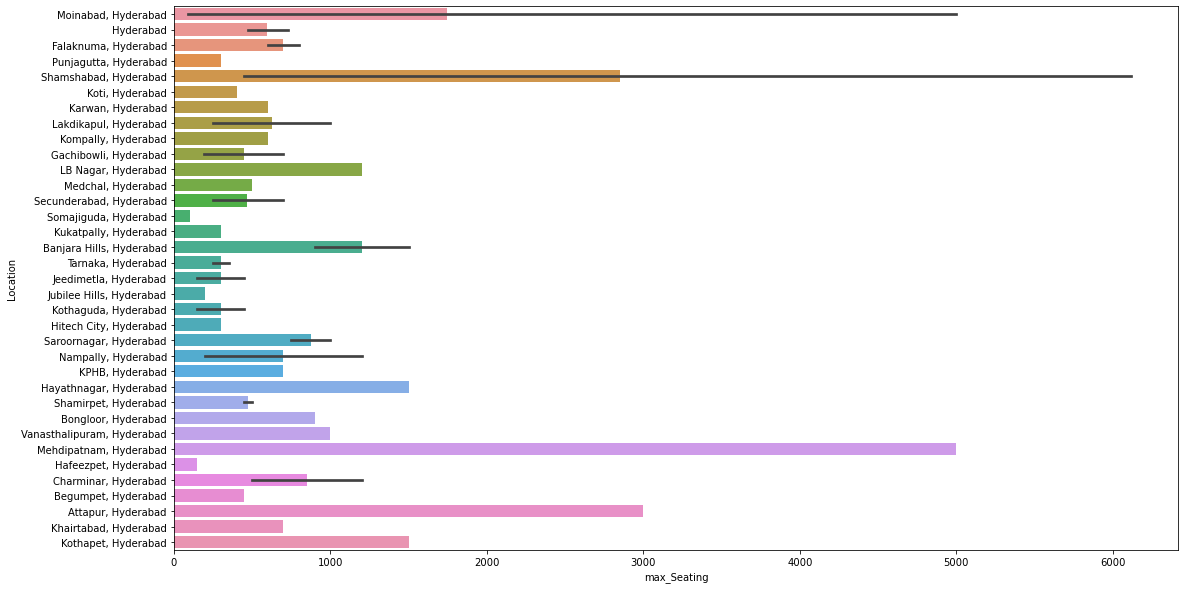

In [65]:
plt.figure(figsize=(18,10))
sns.barplot(df['max_Seating'],df['Location'].head(80))
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


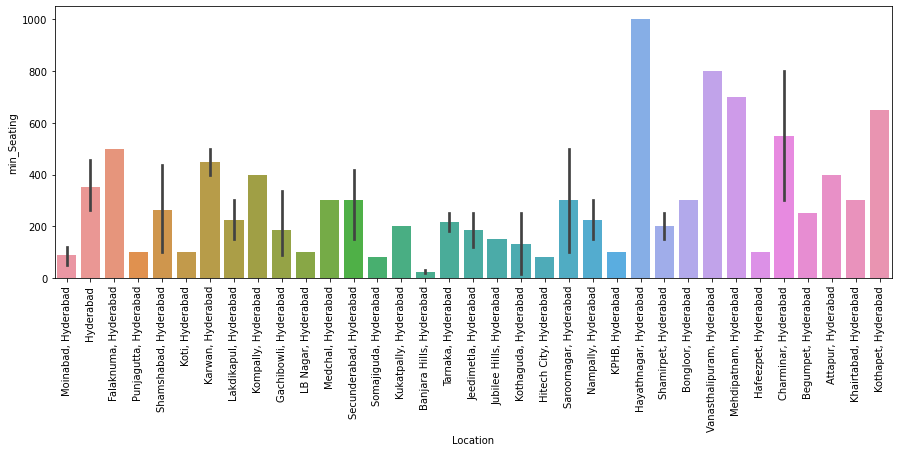

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(df['Location'].head(80),df['min_Seating'])
plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


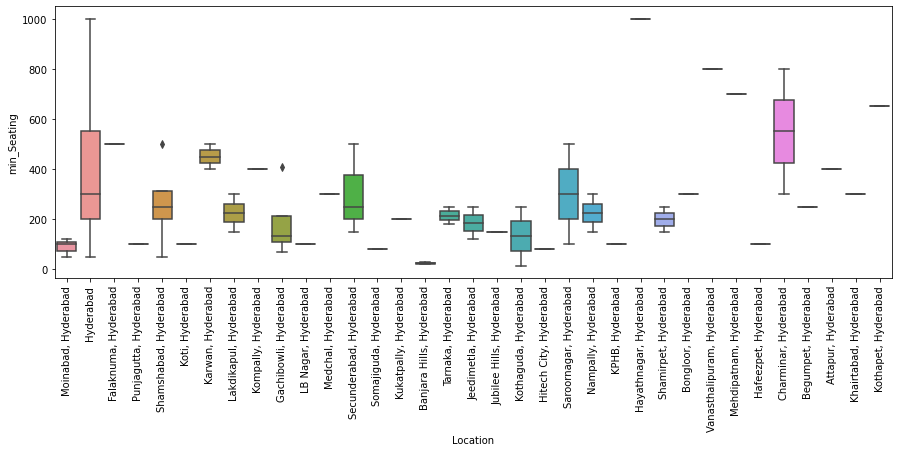

In [68]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Location'].head(80),df['min_Seating'])
plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


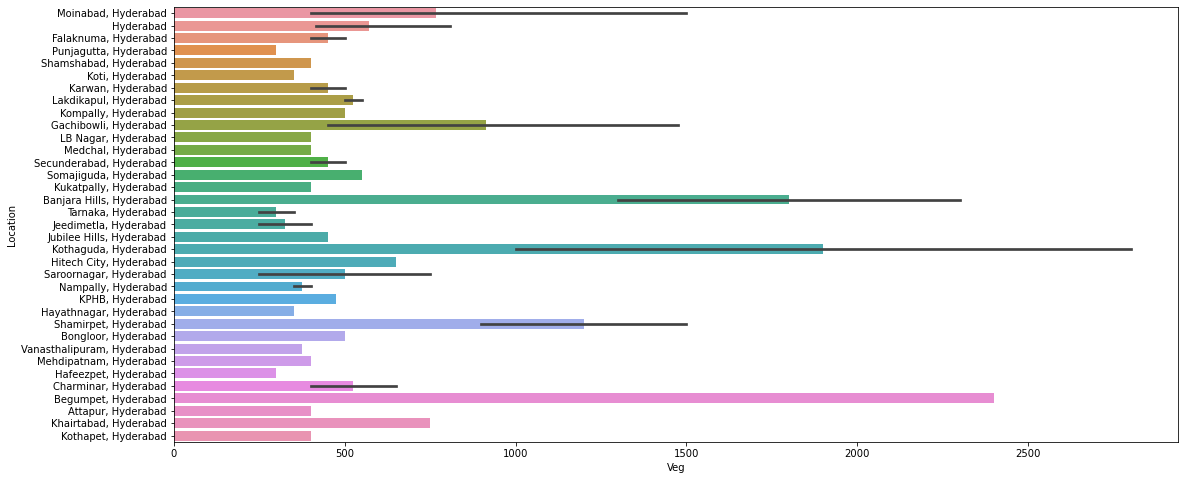

In [69]:
plt.figure(figsize=(18,8))
sns.barplot(df['Veg'],df['Location'].head(80))
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


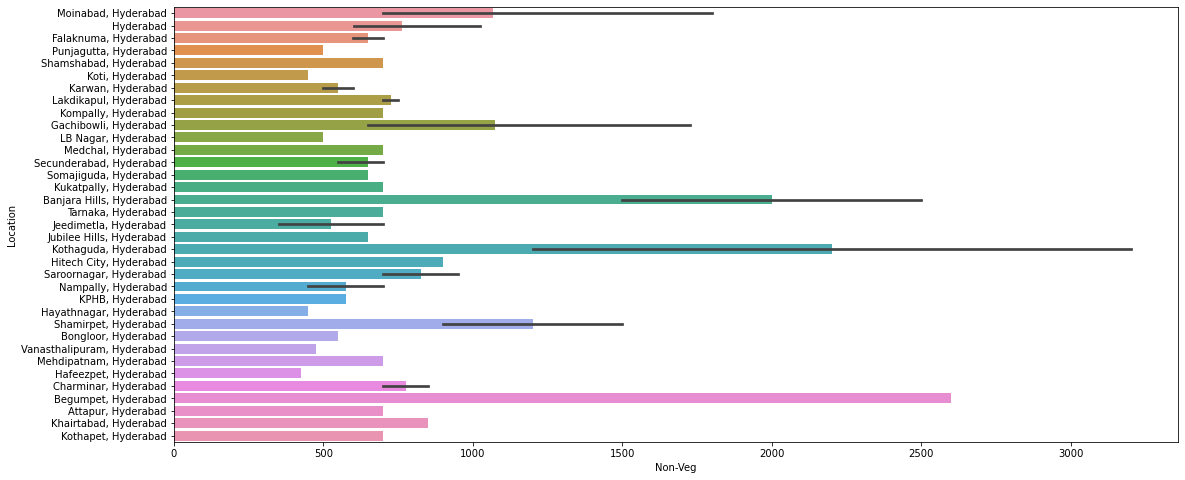

In [70]:
plt.figure(figsize=(18,8))
sns.barplot(df['Non-Veg'],df['Location'].head(80))
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


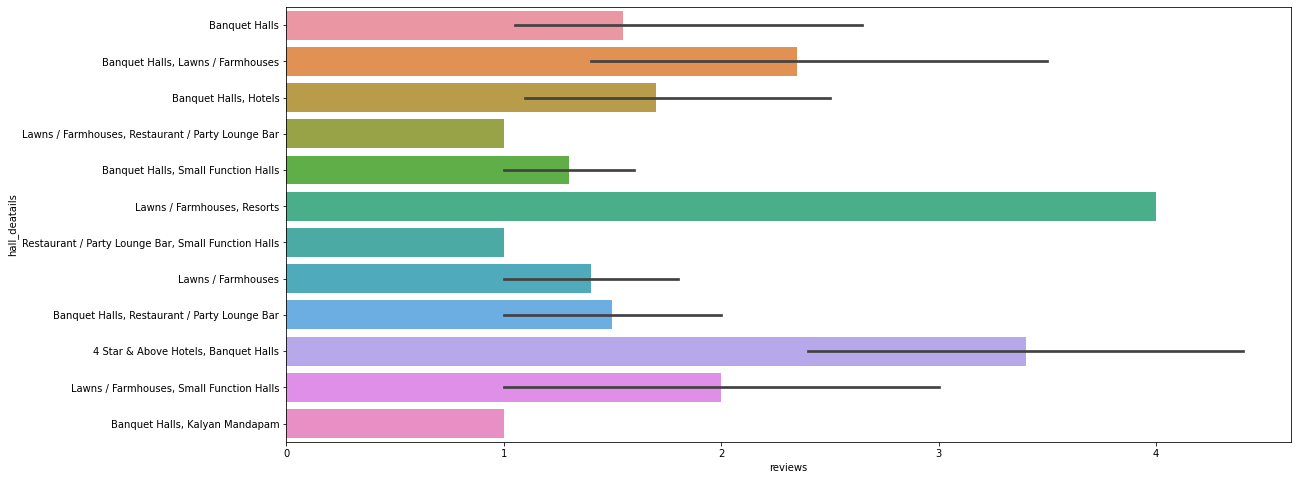

In [195]:
plt.figure(figsize=(18,8))
sns.barplot(df_r['reviews'],df_r['hall_deatails'])
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


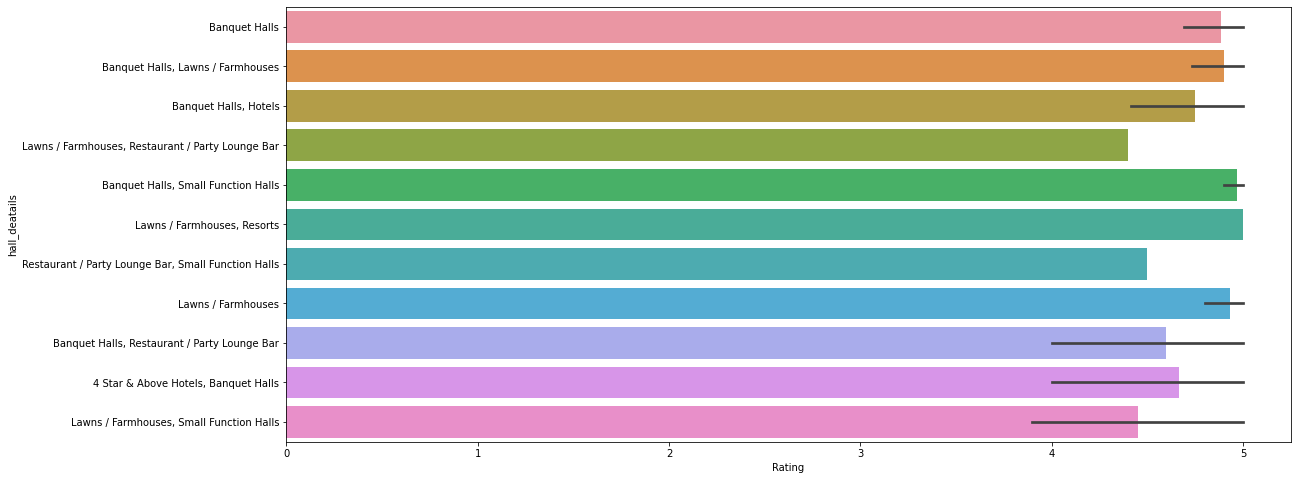

In [198]:
plt.figure(figsize=(18,8))
sns.barplot(df['Rating'],df_r['hall_deatails'].head(51))
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


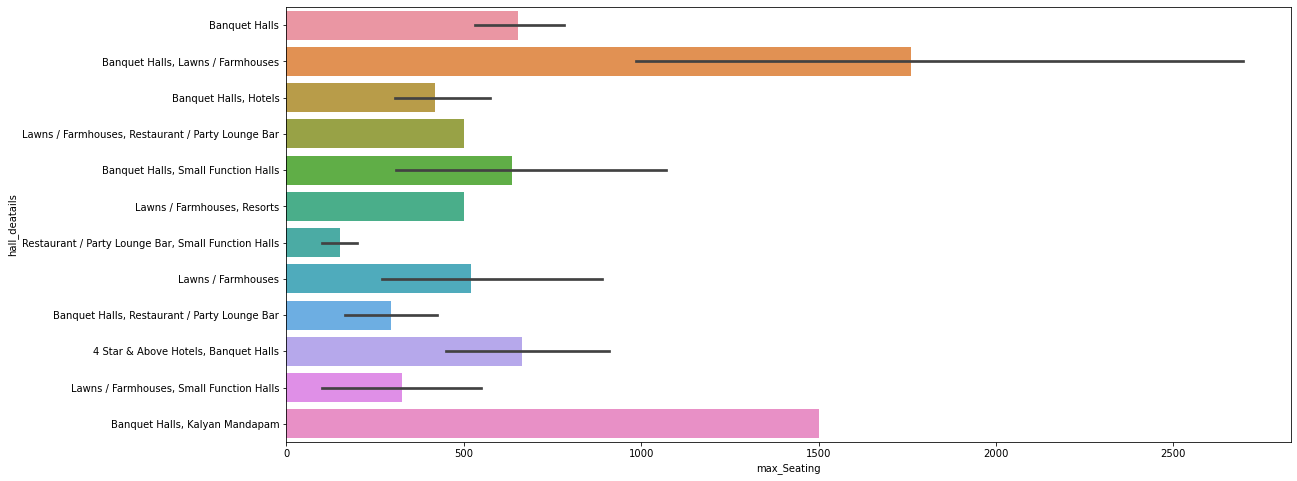

In [74]:
plt.figure(figsize=(18,8))
sns.barplot(df_r['max_Seating'],df_r['hall_deatails'])
#plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


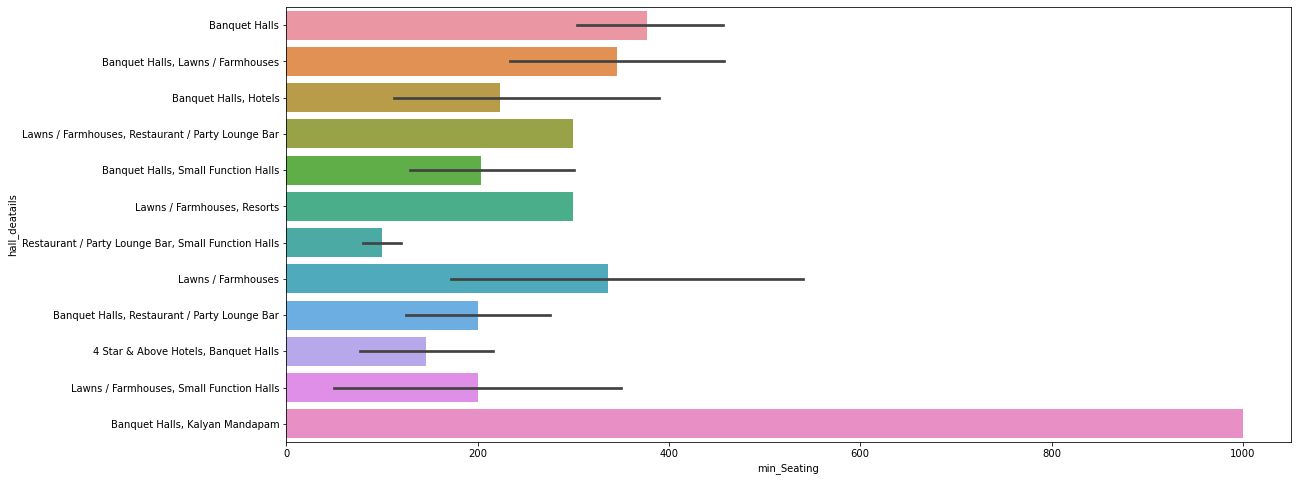

In [75]:
plt.figure(figsize=(18,8))
sns.barplot(df_r['min_Seating'],df_r['hall_deatails'])
#plt.xticks(rotation=90)
plt.show()

In [76]:
# categorical and categorical ===>>> heatmap,cluster map

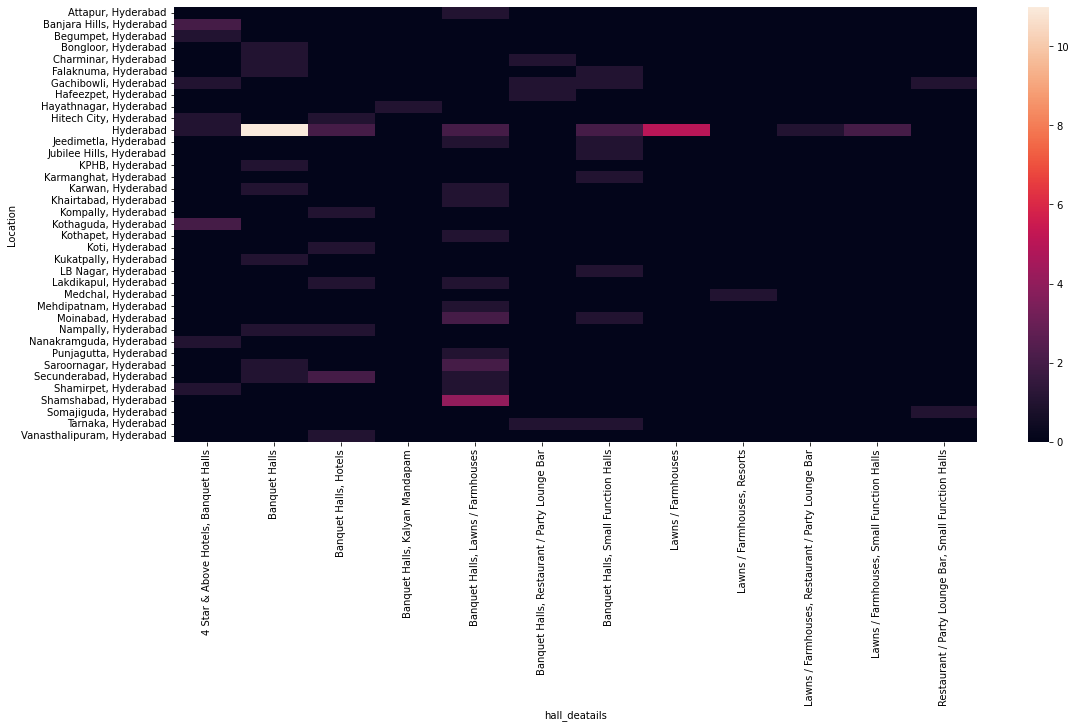

In [77]:
plt.figure(figsize=(18,8))
sns.heatmap(pd.crosstab(df_r['Location'],df_r['hall_deatails']))
#plt.xticks(rotation=90)
plt.show()

# multivariate

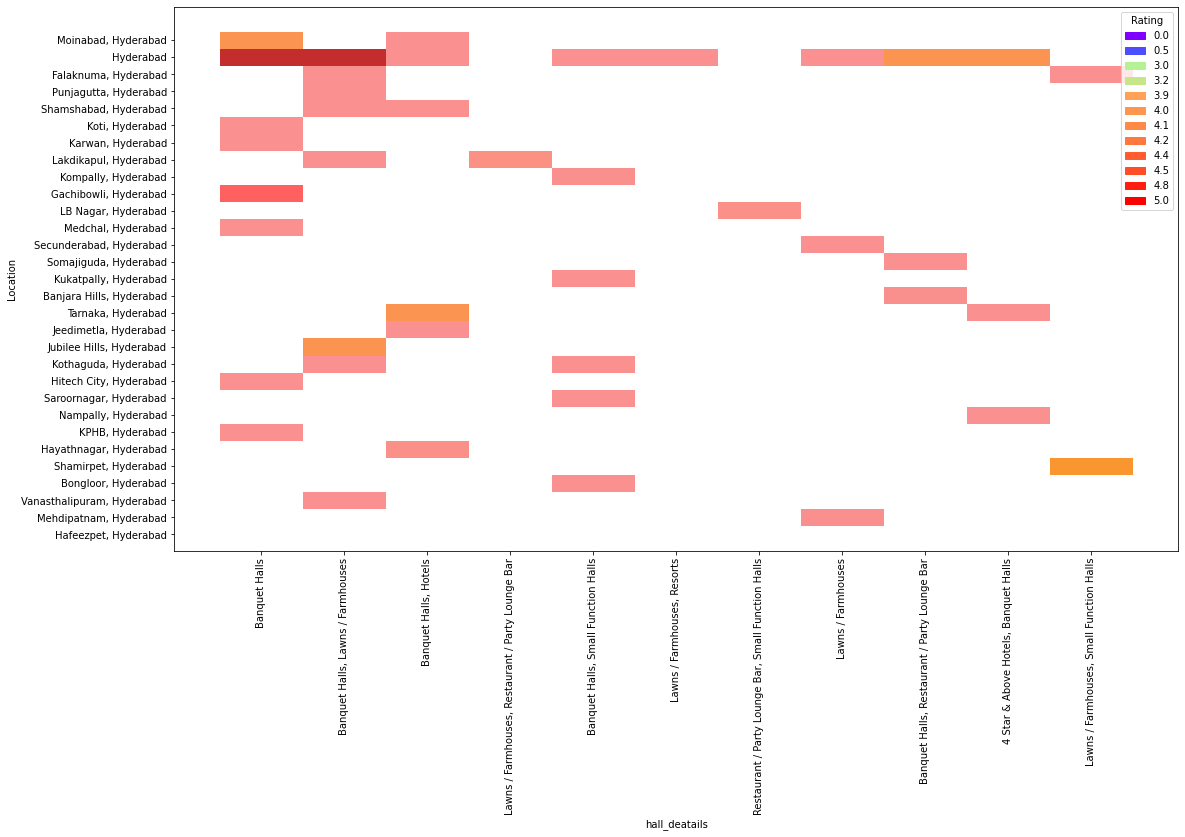

In [193]:
plt.figure(figsize=(18,10))
sns.histplot(x=df_r['hall_deatails'].head(51),y=df['Location'].head(80),hue=df['Rating'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


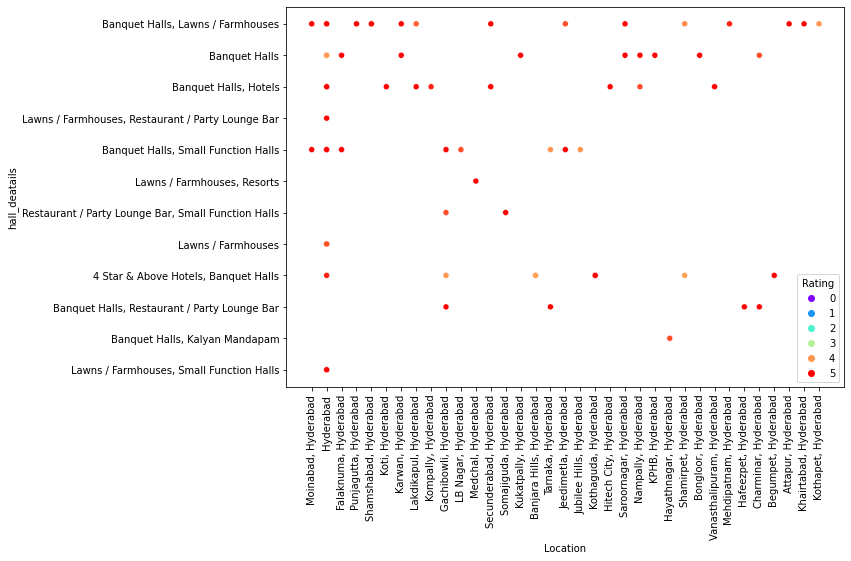

In [111]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['Location'].head(80),df['hall_deatails'],hue=df['Rating'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()
#pd.crosstab(df_r['Veg'],df_r['Rating']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

## and see some more

In [22]:
df.head(1)

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000


In [23]:
df_r.head(1)

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Officers Mess Function Plaza,Hyderabad,Banquet Halls,400,500,1,5.0,600,900


In [84]:
best_halls=df[
                (df['Rating']>4) 
              & (df['hall_deatails'].str.contains('Banquet Halls','Banquet Halls, Lawns / Farmhouses')) 
              & (df['max_Seating'].between(400,600))
            ]

In [85]:
best_halls

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
5,Hotel SVM Grand,"Koti, Hyderabad","Banquet Halls, Hotels",350,450,1,5.0,100,400
6,Taj Convention,"Karwan, Hyderabad",Banquet Halls,400,500,1,5.0,400,600
9,Hotel Kass,"Kompally, Hyderabad","Banquet Halls, Hotels",500,700,2,4.8,400,600
12,SR Convention,"Gachibowli, Hyderabad","Banquet Halls, Small Function Halls",400,700,2,5.0,410,600
26,Ashoka Function Palace,Hyderabad,"Banquet Halls, Small Function Halls",300,350,1,5.0,250,400
28,Novotel Hyderabad Convention Centre,"Kothaguda, Hyderabad","4 Star & Above Hotels, Banquet Halls",2800,3200,3,5.0,250,450
30,Shambhavi A/C Function Hall,Hyderabad,Banquet Halls,400,700,1,5.0,200,400
43,Noor Palace Function Hall,"Falaknuma, Hyderabad","Banquet Halls, Small Function Halls",400,700,1,5.0,500,600
46,Hotel Tourist Plaza,Hyderabad,"Banquet Halls, Hotels",750,700,2,4.8,50,500
55,TNR Gardens Function Hall,"Jeedimetla, Hyderabad","Banquet Halls, Lawns / Farmhouses",250,350,2,4.5,250,450


In [86]:
best_halls.shape

(18, 9)

In [156]:
df_new2=df.copy()

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000
1,Officers Mess Function Plaza,Hyderabad,Banquet Halls,400,500,1,5.0,600,900
2,Radon Convention Hall,"Falaknuma, Hyderabad",Banquet Halls,500,600,1,5.0,500,800
3,Sitara Paradise Ameerpet,"Punjagutta, Hyderabad","Banquet Halls, Lawns / Farmhouses",300,500,1,5.0,100,300
4,KLCC Conventions,"Shamshabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",400,700,1,5.0,500,8000
...,...,...,...,...,...,...,...,...,...
588,Premier Palace,"Shamshabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",600,800,0,0.0,100,300
589,Rose Max Function Hall,Hyderabad,Banquet Halls,500,700,0,0.0,400,600
590,Aaromalé,"Jubilee Hills, Hyderabad","Lawns / Farmhouses, Restaurant / Party Lounge Bar",1000,1000,0,0.0,70,120
591,Sadaat Plaza Function Hall,"Charminar, Hyderabad","Banquet Halls, Small Function Halls",450,650,0,0.0,200,300


In [158]:
client_price=df['Veg']*(600*.35) + df['Non-Veg']*(600*0.65)

In [160]:
df_new2['Client_Price']=pd.DataFrame({'cp':client_price})

In [161]:
df_new2.head()

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating,Client_Price
0,Dream Valley Resorts,"Moinabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",1500,1800,9,4.0,100,5000,1017000.0
1,Officers Mess Function Plaza,Hyderabad,Banquet Halls,400,500,1,5.0,600,900,279000.0
2,Radon Convention Hall,"Falaknuma, Hyderabad",Banquet Halls,500,600,1,5.0,500,800,339000.0
3,Sitara Paradise Ameerpet,"Punjagutta, Hyderabad","Banquet Halls, Lawns / Farmhouses",300,500,1,5.0,100,300,258000.0
4,KLCC Conventions,"Shamshabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",400,700,1,5.0,500,8000,357000.0


In [163]:
df_new2.shape

(593, 10)

In [174]:
best_halls=df_new2[
                (df_new2['Rating']>4) 
              & (df_new2['hall_deatails'].str.contains('Banquet Halls','Banquet Halls, Lawns / Farmhouses')) 
              & (df_new2['max_Seating'].between(600,800)
              & (df_new2['Client_Price']<400000.0))
            ]

In [175]:
best_halls

,Hall_name,Location,hall_deatails,Veg,Non-Veg,reviews,Rating,min_Seating,max_Seating,Client_Price
2,Radon Convention Hall,"Falaknuma, Hyderabad",Banquet Halls,500,600,1,5.0,500,800,339000.0
6,Taj Convention,"Karwan, Hyderabad",Banquet Halls,400,500,1,5.0,400,600,279000.0
8,Suvarna Kalyana Vedika,Hyderabad,Banquet Halls,400,700,1,5.0,550,800,357000.0
9,Hotel Kass,"Kompally, Hyderabad","Banquet Halls, Hotels",500,700,2,4.8,400,600,378000.0
12,SR Convention,"Gachibowli, Hyderabad","Banquet Halls, Small Function Halls",400,700,2,5.0,410,600,357000.0
15,Tivoli Gardens,"Secunderabad, Hyderabad","Banquet Halls, Lawns / Farmhouses",400,700,1,5.0,500,700,357000.0
35,Vaaraahi Banquet Halls,"KPHB, Hyderabad",Banquet Halls,475,575,2,5.0,100,700,324000.0
43,Noor Palace Function Hall,"Falaknuma, Hyderabad","Banquet Halls, Small Function Halls",400,700,1,5.0,500,600,357000.0
61,Sri Laxminarayan Bhavan,"Saroornagar, Hyderabad",Banquet Halls,250,700,1,5.0,500,750,325500.0
76,Ashoka Garden,"Karwan, Hyderabad","Banquet Halls, Lawns / Farmhouses",500,600,1,5.0,500,600,339000.0
